<a href="https://colab.research.google.com/github/Krittin-S/DSDP-Week4-Regression/blob/main/OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [6]:
import cv2
import pytesseract
import numpy as np

In [7]:
import pytesseract

# Set the path to the Tesseract executable (if needed)
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract' # For Colab

In [15]:
def extract_tags_from_cloud_marks(image_path):
    """
    Extracts equipment tags from red cloud marks in a P&ID image.

    Args:
        image_path: Path to the input image.

    Returns:
        A list of extracted equipment tags.
    """

    # Load the image
    image = cv2.imread(image_path)

    # Convert to HSV color space
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define the red color range for cloud marks
    lower_red = np.array([0, 100, 100])
    upper_red = np.array([10, 255, 255])

    # Create a mask for red regions
    mask = cv2.inRange(hsv, lower_red, upper_red)

    # Find contours of red regions (cloud marks)
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Extract tags from each cloud mark
    tags = []
    for contour in contours:
        # Get bounding rectangle of the contour
        x, y, w, h = cv2.boundingRect(contour)

        # Crop the cloud mark region
        cloud_region = image[y:y + h, x:x + w]

        # Perform OCR on the cropped region
        text = pytesseract.image_to_string(cloud_region, config='--psm 6')

        # Append the extracted text to the tags list
        tags.append(text.strip())

    return tags


In [15]:
def extract_tags(image_path):
    """Extracts equipment tags from a P&ID image."""

    try:
        # 1. Load and preprocess the image using OpenCV (cv2)
        img = cv2.imread(image_path)

        if img is None:  # Check if image loading was successful
            print(f"Error: Could not load image at {image_path}")
            return []
        # Convert to grayscale (often improves OCR accuracy)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Noise reduction (e.g., Gaussian blur)
        blurred = cv2.GaussianBlur(gray, (5, 5), 0)

        # Thresholding (to create a binary image - black and white)
        _, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        # Other preprocessing steps as needed (e.g., deskewing, contour detection)
        # ...

        # 2. Perform OCR using pytesseract
        text = pytesseract.image_to_string(thresh, config='--psm 6') # Adjust psm as needed
        print("Raw OCR Output:")
        print(text)  # Print the extracted text

        # 3. Postprocess the extracted text to isolate tags
        # (This is the most challenging part and highly specific to your P&ID format)
        # Example using regular expressions (adapt as needed):
        import re
 #       tag_pattern = r"[P-Z]{1,2}-\d{1,4}"  # Example: matches "P-123", "XV-2020", etc.
 #       tags = re.findall(tag_pattern, text)
        tag_pattern = r"[P-Z]{1,2}-\d{1,4}"  # Refine this pattern!
        tags = re.findall(tag_pattern, text, re.IGNORECASE)  # Case-insensitive matching
        return tags

    except Exception as e:
        print(f"Error: {e}")
        return []

# Example usage:
image_path = "Capture.JPG"

extracted_tags = extract_tags(image_path)
print(extracted_tags)

Raw OCR Output:
= ———eee 5 3 |
| wn By
| er --
a fn S abet
| ron ° Hi Seba I 1
| £ O- SRF . . ! ;
&) ier} at f Cary a | @ nih 41
nooo oalle af Bis = |
= a Whee ee (S)) Oi is
/ , (ey ca Ns a Q , eel A 4 a | |
eae? SD tf ee Rey tee
= ee eo ERS = |
a-c aye patente) y me ake ; nfs | \
| macs ose rae fo, Qe re = Pf Ry (ty —|faatanamn] |My
a1 ¥ a GO. on =
rasron eae oh Gs se r a eet , | |
gl eR LE te le [P03 | a % O ky | |
| a af UEs moe oxam I}, a= |_pop emer _y |
| ee oe te Sn ES Saw seassaTonTes-sc7 LL zap Nt rere edema eae Fa
CSTs) cer @ CHEF ray) | Spel enero woen on a |
| FEE recoucrom yer 09.1 poucnon Magen 0.2 Cet aet
a a

[]


In [20]:
from PIL import Image, ImageEnhance, ImageFilter
import pytesseract
import re

In [30]:
# Load the image
image_path = "Capture.JPG"  # Replace with your image path
image = Image.open(image_path)


if image is None:
    print(f"Error: Could not load image at '{image_path}'")
    exit()

In [31]:
# Preprocess the image using OpenCV
def preprocess_image(image):
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply adaptive thresholding
    thresh = cv2.adaptiveThreshold(
        gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2
    )

    # Apply a slight blur to reduce noise
    blurred = cv2.medianBlur(thresh, 3)

    return blurred

# Extract tags using OCR and regex
def extract_tags(image):
    # Use Tesseract OCR with custom configuration
    custom_config = r'--psm 6 --oem 3'
    ocr_result = pytesseract.image_to_string(image, config=custom_config)

    # Use regex to extract tags (e.g., PIT2020, XSV2025)
    tag_pattern = r'\b[A-Z]{2,}[0-9]{3,}\b'
    tags = re.findall(tag_pattern, ocr_result)

    return tags

    # Define regions of interest (manually update based on the image)
def extract_from_regions(image, regions):
    tags = []
    for region in regions:
        x1, y1, x2, y2 = region
        cropped = image[y1:y2, x1:x2]
        tags.extend(extract_tags(cropped))
    return tags


In [32]:
# Define specific regions of interest
regions = [
    (500, 200, 1000, 800),  # Example region (adjust coordinates)
    (1200, 500, 1700, 1000),  # Example region (adjust coordinates)
]

# Preprocess the image
processed_image = preprocess_image(image)

# Extract tags from the entire image
all_tags = extract_tags(processed_image)

# Extract tags from specific regions
region_tags = extract_from_regions(processed_image, regions)

# Combine results and remove duplicates
all_extracted_tags = list(set(all_tags + region_tags))

# Output the results
print("Extracted Equipment Tags:")
print(all_extracted_tags)

# Save the preprocessed image for debugging
debug_image_path = "preprocessed_image_debug.jpg"
cv2.imwrite(debug_image_path, processed_image)
print(f"Preprocessed image saved to {debug_image_path}")

error: OpenCV(4.10.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'


In [16]:
# Example usage
image_path = 'Capture.JPG'  # Replace with your image path
extracted_tags = extract_tags_from_cloud_marks(image_path)


In [18]:
def format_extracted_tags(tags):
    """
    Formats a list of extracted tags by removing extra whitespace and special characters.

    Args:
        tags: A list of extracted tags.

    Returns:
        A list of formatted tags.
    """

    formatted_tags = []
    for tag in tags:
        # Remove leading/trailing whitespace and newlines
        tag = tag.strip()

        # Remove special characters (you might need to customize this)
        tag = tag.replace('\n', '')
        tag = tag.replace('|', '')
        tag = tag.replace('~', '')
        tag = tag.replace('-', '')
        tag = tag.replace('‘', '')
        tag = tag.replace('>', '')
        tag = tag.replace('_', '')
        tag = tag.replace('.', '')

        # Add the tag to the formatted list if it's not empty
        if tag:
            formatted_tags.append(tag)

    return formatted_tags

# Example usage:
extracted_tags = [
    # ... (Your extracted tags list)
]

formatted_tags = format_extracted_tags(extracted_tags)

print("Formatted Tags:")
for tag in formatted_tags:
    print(tag)

Formatted Tags:


In [4]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 2s (2,644 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [12]:
!pip install pytesseract

In [ ]:
# Load the image
image_path = 'Capture.jpg'
image = cv2.imread(image_path)

In [ ]:
# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding to make the text stand out
_, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)

# Find contours to detect cloud-marked regions
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Loop through contours and filter based on size and shape
cloud_regions = []
for cnt in contours:
    # Approximate the contour to check if it has a cloud-like shape
    approx = cv2.approxPolyDP(cnt, 0.02 * cv2.arcLength(cnt, True), True)
    # Define area threshold or specific shape criteria here if necessary
    if len(approx) > 8:  # Assuming cloud shape has a wavy pattern
        x, y, w, h = cv2.boundingRect(cnt)
        cloud_regions.append((x, y, w, h))

# Extract text from each detected cloud-mark region using OCR
instrument_tags = []
for (x, y, w, h) in cloud_regions:
    # Crop the region
    cloud_crop = image[y:y+h, x:x+w]

    # Apply OCR on the cropped region
    text = pytesseract.image_to_string(cloud_crop, config='--psm 6')

    # Filter text to include only instrument tag patterns if needed (e.g., regex)
    instrument_tags.append(text.strip())

# Print the list of extracted instrument tags
print("Instrument Tags Found in Cloud Marks:")
for tag in instrument_tags:
    print(tag)

error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [ ]:
# prompt: ---------------------------------------------------------------------------
# error                                     Traceback (most recent call last)
# <ipython-input-5-4f528fbcb0da> in <cell line: 2>()
#       1 # Convert to grayscale
# ----> 2 gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#       3
#       4 # Apply thresholding to make the text stand out
#       5 _, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)
# error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

import cv2
import pytesseract
from pytesseract import Output
# Load the image
image_path = 'Capture.jpg'  # Replace with your image path
image = cv2.imread(image_path)

if image is None:
    print(f"Error: Could not open or read the image at {image_path}")
else:
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply thresholding to make the text stand out
    _, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)

    # Find contours to detect cloud-marked regions
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Loop through contours and filter based on size and shape
    cloud_regions = []
    for cnt in contours:
        # Approximate the contour to check if it has a cloud-like shape
        approx = cv2.approxPolyDP(cnt, 0.02 * cv2.arcLength(cnt, True), True)
        # Define area threshold or specific shape criteria here if necessary
        if len(approx) > 8:  # Assuming cloud shape has a wavy pattern
            x, y, w, h = cv2.boundingRect(cnt)
            cloud_regions.append((x, y, w, h))

    # Extract text from each detected cloud-mark region using OCR
    instrument_tags = []
    for (x, y, w, h) in cloud_regions:
        # Crop the region
        cloud_crop = image[y:y+h, x:x+w]

        # Apply OCR on the cropped region
        text = pytesseract.image_to_string(cloud_crop, config='--psm 6')

        # Filter text to include only instrument tag patterns if needed (e.g., regex)
        instrument_tags.append(text.strip())

    # Print the list of extracted instrument tags
    print("Instrument Tags Found in Cloud Marks:")
    for tag in instrument_tags:
tag

In [ ]:
if image is None:
    print(f"Error: Could not open or read the image at {image_path}")
else:
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply thresholding to make the text stand out
    _, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)

    # Find contours to detect cloud-marked regions
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Loop through contours and filter based on size and shape
    cloud_regions = []
    for cnt in contours:
        # Approximate the contour to check if it has a cloud-like shape
        approx = cv2.approxPolyDP(cnt, 0.02 * cv2.arcLength(cnt, True), True)
        # Define area threshold or specific shape criteria here if necessary
        if len(approx) > 8:  # Assuming cloud shape has a wavy pattern
            x, y, w, h = cv2.boundingRect(cnt)
            cloud_regions.append((x, y, w, h))

    # Extract text from each detected cloud-mark region using OCR
    instrument_tags = []
    for (x, y, w, h) in cloud_regions:
        # Crop the region
        cloud_crop = image[y:y+h, x:x+w]

        # Apply OCR on the cropped region
        text = pytesseract.image_to_string(cloud_crop, config='--psm 6')

        # Filter text to include only instrument tag patterns if needed (e.g., regex)
        instrument_tags.append(text.strip())

    # Print the list of extracted instrument tags
    print("Instrument Tags Found in Cloud Marks:")
    for tag in instrument_tags:

SyntaxError: incomplete input (<ipython-input-6-24eaaad30480>, line 37)

In [39]:
from PIL import Image, ImageEnhance
import cv2
import pytesseract
import re

In [40]:
# Load the image using PIL
image_path = "Capture.JPG"
pil_image = Image.open(image_path)

# Enhance contrast
enhancer = ImageEnhance.Contrast(pil_image)
pil_image = enhancer.enhance(2.0)  # Adjust the factor as needed

# Sharpen the image
pil_image = pil_image.filter(ImageFilter.SHARPEN)

if pil_image is None:
    print(f"Error: Could not load image at '{image_path}'")
    exit()

# Convert PIL Image to OpenCV (NumPy array)
image = cv2.cvtColor(np.array(pil_image), cv2.COLOR_RGB2BGR) # PIL uses RGB, OpenCV uses BGR


In [41]:
print(image)

[[[107 107 107]
  [  0   0   0]
  [  9   9   9]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[105 105 105]
  [  0   0   0]
  [  0   0   0]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[101 101 101]
  [  0   0   0]
  [  0   0   0]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[105 105 105]
  [  0   0   0]
  [  0   0   0]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[105 105 105]
  [  0   0   0]
  [  0   0   0]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[105 105 105]
  [  0   0   0]
  [  9   9   9]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


In [54]:
# Preprocess the image using OpenCV
'''
def preprocess_image(image):
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply adaptive thresholding
    thresh = cv2.adaptiveThreshold(
        gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2
    )

    # Apply a slight blur to reduce noise
    blurred = cv2.medianBlur(thresh, 3)

    return blurred
'''

import cv2
import numpy as np

def preprocess_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # 1. Bilateral Filtering (reduce noise while preserving edges)
    blurred = cv2.bilateralFilter(gray, d=5, sigmaColor=50, sigmaSpace=50)


    # 2. Adaptive Thresholding (isolate text)
    thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, blockSize=11, C=2)

    # 3. Morphological Closing (connect broken text)
    kernel = np.ones((3,3), np.uint8)
    closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

    return closed

# Extract tags using OCR and regex
def extract_tags(image):
    # Use Tesseract OCR with custom configuration
    custom_config = r'--psm 6 --oem 3'
    ocr_result = pytesseract.image_to_string(image, config=custom_config)

    # Use regex to extract tags (e.g., PIT2020, XSV2025)
    tag_pattern = r'\b[A-Z]{2,}[0-9]{3,}\b'
    tags = re.findall(tag_pattern, ocr_result)

    return tags

    # Define regions of interest (manually update based on the image)
def extract_from_regions(image, regions):
    tags = []
    for region in regions:
        x1, y1, x2, y2 = region
        cropped = image[y1:y2, x1:x2]
        tags.extend(extract_tags(cropped))
    return tags

def extract_tags_from_contours(image):
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    tags = []
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        if w > 10 and h > 10:
            roi = image[y:y+h, x:x+w]
            roi_text = pytesseract.image_to_string(roi, config=custom_config)

            # Extract tags from roi_text using regex (or other logic)
            tag_pattern = r"TP-[0-9]+"  # Example: Matches "TP-" followed by numbers
            extracted_tags_from_roi = re.findall(tag_pattern, roi_text) # Define the variable here

            tags.extend(extracted_tags_from_roi)
    return tags


In [37]:
processed_image = preprocess_image(image)  # Use the OpenCV image here

In [55]:
# Define specific regions of interest
regions = [
    (500, 200, 1000, 800),  # Example region (adjust coordinates)
    (1200, 500, 1700, 1000),  # Example region (adjust coordinates)
]

# Preprocess the image
processed_image = preprocess_image(image)

# Define Tesseract configuration (do this *before* using it)
custom_config = r'--psm 6 --oem 3'  # Or other appropriate settings

# Test OCR on the whole image
all_text = pytesseract.image_to_string(processed_image, config=custom_config)
print("OCR Result (whole image):\n", all_text)

# Extract tags from the entire image
all_tags = extract_tags(processed_image)

# Extract tags
tags = extract_tags_from_contours(processed_image)
print("Extracted Tags:", tags)

# Extract tags from specific regions
region_tags = extract_from_regions(processed_image, regions)

# Combine results and remove duplicates
all_extracted_tags = list(set(all_tags + region_tags))

# Output the results
print("Extracted Equipment Tags:")
print(all_extracted_tags)

# Save the preprocessed image for debugging
debug_image_path = "preprocessed_image_debug.jpg"
cv2.imwrite(debug_image_path, processed_image)
print(f"Preprocessed image saved to {debug_image_path}")

OCR Result (whole image):
 | i :
| ; Il
IN
ai Ace Menta Ts —
| YE @-O)- , ¥ ee o Sy
Cn i leer =a Ris ele Paro.

| a: el rr | ee cee

| pT @QE aut aie |Ey @Q@Qz |
er mao) 4) GB a ona a nee

Tet ee ri COMET ea, Been 7 Nhe eee SMe Nee ne A ae) Rhee |

cae one a: ~~ ne | ae Sages Eel is | |
aoe Ta & Oat: oe te ig Ea 7 io ioe ao

cas @-4 or ow air restr i [ nto Ney enp ; | |
| , eo Cae I
| Cas eee feet ek) i ara sel eA Re faethe fA = | !

Extracted Tags: []
Extracted Equipment Tags:
[]
Preprocessed image saved to preprocessed_image_debug.jpg


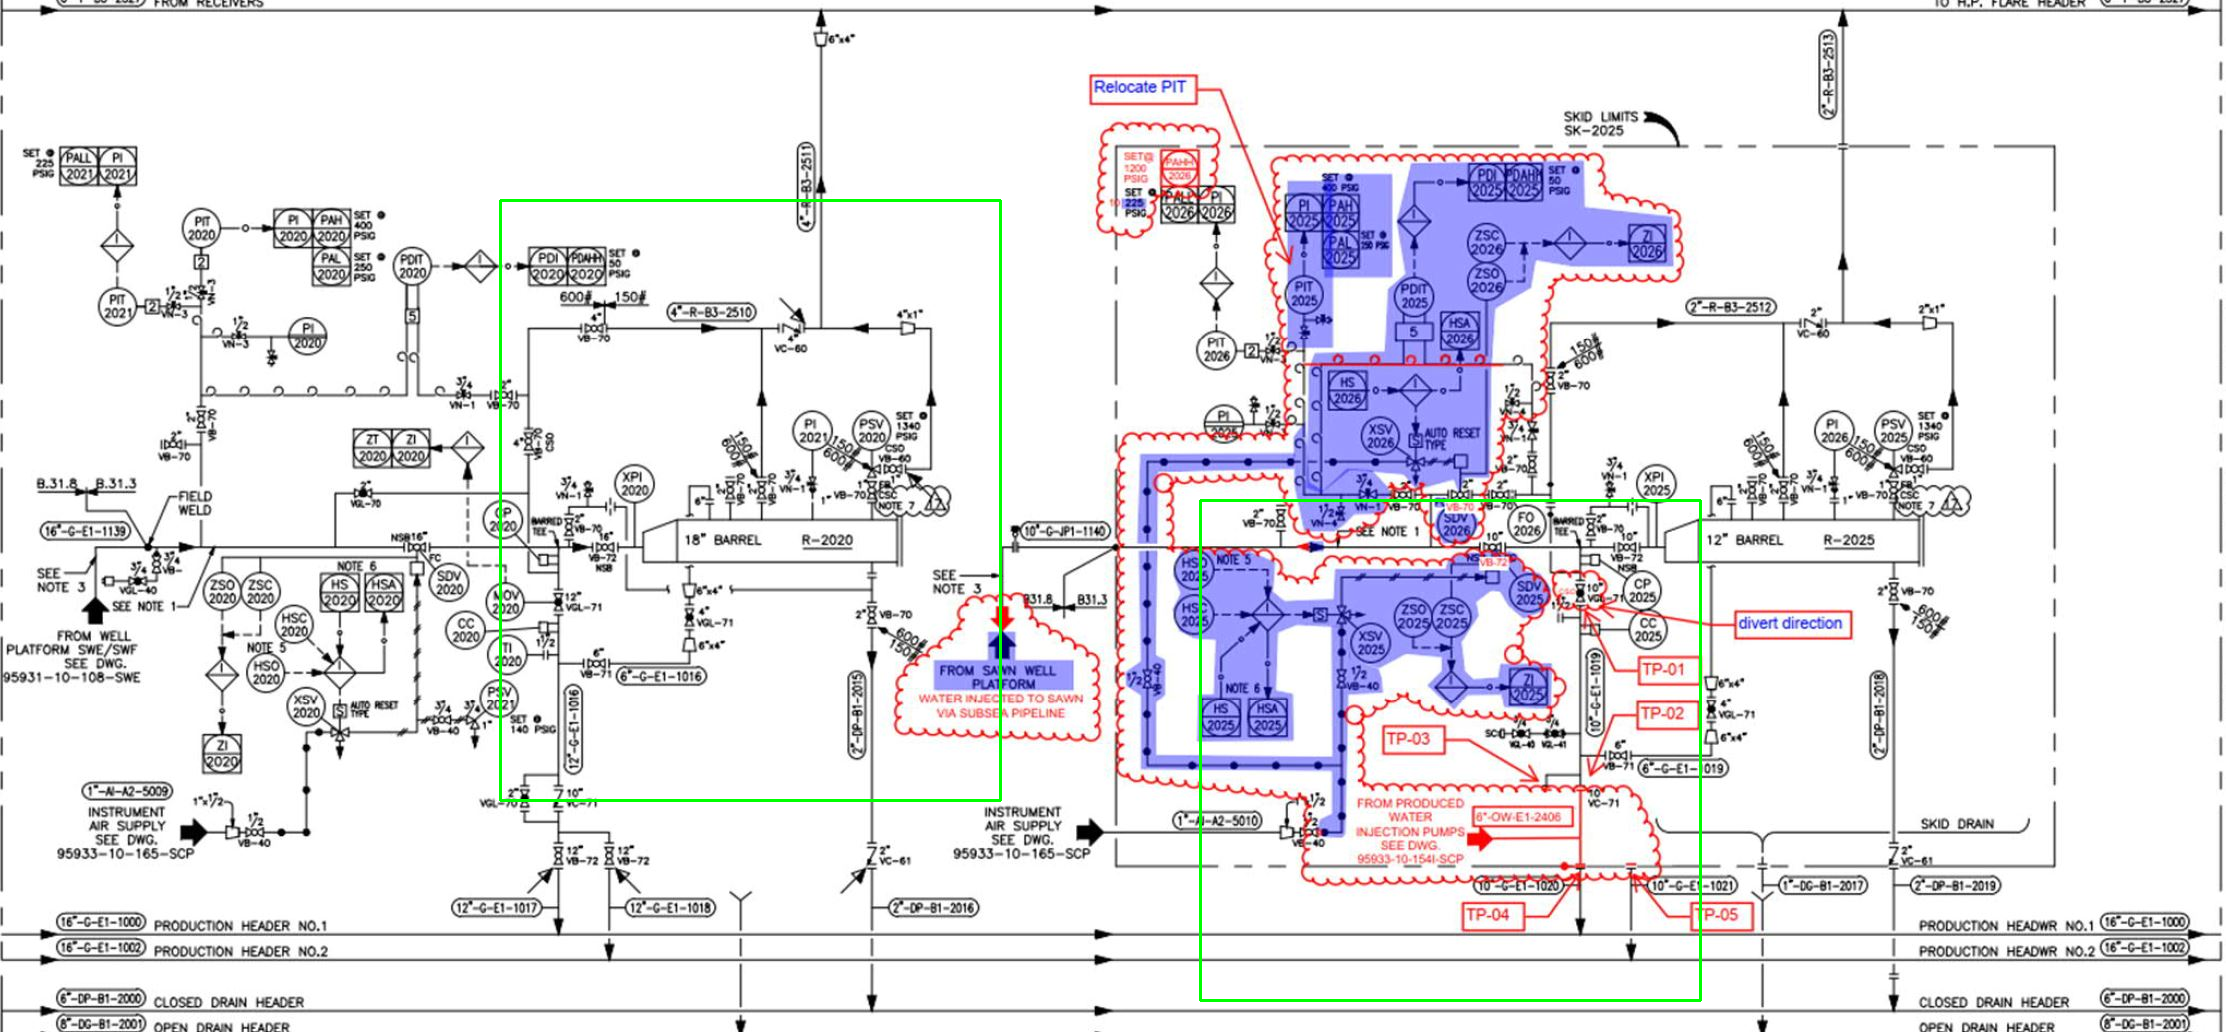

In [56]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Import the correct function

image = cv2.imread("Capture.JPG")
regions = [
    (500, 200, 1000, 800),  # Your ROI coordinates
    (1200, 500, 1700, 1000),
]

for x1, y1, x2, y2 in regions:
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

cv2_imshow(image) # Use cv2_imshow instead of cv2.imshow
# cv2.waitKey(0)  # Not needed in Colab
# cv2.destroyAllWindows() # Not needed in Colab

In [58]:
!pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 37.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 912.2/912.2 kB 44.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.8/286.8 kB 21.5 MB/s eta 0:00:00


In [59]:
import cv2
import numpy as np
import easyocr
import re

# Initialize the EasyOCR reader (specify languages if needed)
reader = easyocr.Reader(['en']) # English, or add other languages

def preprocess_image(image):
    # (Your existing preprocessing code can likely be simplified
    #  or even removed, as EasyOCR handles a lot of this internally)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY) # Simple thresholding
    return thresh


def extract_tags_from_image(image):
    results = reader.readtext(image)
    tags = []
    for (bbox, text, prob) in results:
        # Use regex or other logic to extract tags from the detected text
        tag_pattern = r"TP-[0-9]+"  # Example regex
        extracted_tags = re.findall(tag_pattern, text)
        tags.extend(extracted_tags)
    return tags


# Load the image
image_path = "Capture.JPG"
image = cv2.imread(image_path)

if image is None:
    print(f"Error: Could not load image at '{image_path}'")
    exit()

# Preprocess the image (optional, EasyOCR might handle it well without this)
processed_image = preprocess_image(image)

# Extract tags
tags = extract_tags_from_image(processed_image)

print("Extracted Tags:", tags)

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% CompleteExtracted Tags: []


In [63]:
import cv2
from google.colab.patches import cv2_imshow  # Use this for image display in Colab
import easyocr
import numpy as np

# Load the image
image = cv2.imread("Capture.JPG")

# Preprocessing (example: grayscale conversion)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Create the reader with language setting
reader = easyocr.Reader(['en'])  # Specify 'en' for English

# Perform OCR with adjustments
results = reader.readtext(gray, detail=0, paragraph=True, decoder='beamsearch') # Adjust parameters

# Print the results
print(results)

# Example of drawing boxes (if you use detail=1)
if isinstance(results[0], tuple): # Check if results include bounding boxes
    for (bbox, text, prob) in results:
        (tl, tr, br, bl) = bbox
        tl = (int(tl[0]), int(tl[1]))
        tr = (int(tr[0]), int(tr[1]))
        br = (int(br[0]), int(br[1]))
        bl = (int(bl[0]), int(bl[1]))
        cv2.rectangle(image, tl, br, (0, 255, 0), 2)
        cv2.putText(image, text, (tl[0], tl[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

    cv2_imshow(image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

['Relocate PIT', 'SktDLvits Sk-2025', 'Ln', 'FS', '2020', '670245020 4 7020', '026', '2070', '020 020 6004 J501', 'ZS0 2026', 'Pdit 2025', 'R-@J-5io', 'C-C0', '2', 'Ito 2021 7020 7 600', '4Jco 2026 7025 Ps1 830 7600 Hio', '07 RERI', '8_Le 8E', '-RE8', '(6* G-E-I3J', '~GPi-I', 'KOIE', '2020', '18" BARREL', 'R-2020', '12" B4RREL', '2025', 'A', 'KSO 2025', 'SEE NOTE', 'SEE NOTE', '2020', 'PJLe BJLJ', '2025', 'S WoTE', 'KSC 20251', '09-70', 'divert directon', 'FROV MELL (PLatform SME/SWF SeE DwG_ 95951-10-iC8-Swe', 'ROm', 'FROVSAHNWELL PLATFORU', 'TP-01', '202', '~6-€1-146', 'Tole', 'MATCR MUECIED{0m SUBSCA PPELINE C', 'TP-02', 'TP-03', '0c0 {', '2020', '~GE-409', '0k39 INSTRUMENT NR SuPpLy SEE DtGa', 'FROL PRooLCED WATCR 6*0E1-2*06 AECTONPLKS SEEDRG SCP', 'INSTRUVENT NR SuppLy SEE DMC', 'Sio', 'SXDDRAIA', '9593}-10-165-SCP', '8"', '959jJ_ 10-165-SCP', 'Q0 -0i-Tod', 'W G L-4OZ Tp-05', '6-c-8-O', 'GBLZWD', '(2 6 E-IolZ', '66 W-JOD', 'CRBLQIO', 'TP-04', 'GEO PRODUION HEADER NO.I (e 6 E-Ico2)

In [64]:
import cv2
from google.colab.patches import cv2_imshow
import easyocr
import numpy as np

# Load image
image = cv2.imread("Capture.JPG")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 1. Thresholding (crucial for this type of image)
_, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY) # Experiment with threshold value

# 2. Noise Reduction (optional, try if thresholding isn't enough)
#denoised = cv2.medianBlur(thresh, 3)  # Uncomment if needed

# 3. Circle Detection (using HoughCircles) - The Key Improvement
circles = cv2.HoughCircles(thresh, cv2.HOUGH_GRADIENT, dp=1, minDist=20,
                           param1=50, param2=30, minRadius=10, maxRadius=50) # Adjust parameters

reader = easyocr.Reader(['en'])

if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        # Create a mask for each circle
        mask = np.zeros_like(gray)
        cv2.circle(mask, (i[0], i[1]), i[2], (255, 255, 255), -1)

        # Apply the mask to the thresholded image
        masked_image = cv2.bitwise_and(thresh, thresh, mask=mask)


        # Perform OCR on the masked region
        results = reader.readtext(masked_image, detail=0, decoder='beamsearch')

        # Draw circle and print results
        cv2.circle(image, (i[0], i[1]), i[2], (0, 255, 0), 2)
        if results:  # Check if any text was detected
            text = " ".join(results) # Combine multiple results if needed
            cv2.putText(image, text, (i[0]-40, i[1]), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1) # Adjust position and font size
            print(f"Circle at ({i[0]}, {i[1]}): {text}")

cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()

Circle at (294, 622): HSc
Circle at (812, 430): 207
Circle at (1656, 484): 3075
Circle at (1832, 432): 7026
Circle at (264, 674): 70z


In [65]:
import cv2
import easyocr
import numpy as np

def extract_tags(image_path):
    """
    Extracts equipment tags from an image containing circular tags.

    Args:
        image_path: Path to the image file.

    Returns:
        A list of dictionaries, where each dictionary contains the tag text and
        the circle's center coordinates. Returns an empty list if no tags are found
        or if an error occurs.
    """

    try:
        image = cv2.imread(image_path)
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        _, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)  # Adjust threshold if needed

        circles = cv2.HoughCircles(thresh, cv2.HOUGH_GRADIENT, dp=1, minDist=20,
                                   param1=50, param2=30, minRadius=10, maxRadius=50)  # Adjust parameters

        reader = easyocr.Reader(['en'])  # Initialize OCR reader
        extracted_tags = []

        if circles is not None:
            circles = np.uint16(np.around(circles))
            for i in circles[0, :]:
                x, y, r = i[0], i[1], i[2]  # Extract circle center and radius

                mask = np.zeros_like(gray)
                cv2.circle(mask, (x, y), r, (255, 255, 255), -1)  # Create circular mask

                masked_image = cv2.bitwise_and(thresh, thresh, mask=mask)

                results = reader.readtext(masked_image, detail=0, decoder='beamsearch')

                if results:
                    text = " ".join(results)
                    extracted_tags.append({"text": text, "center": (x, y)})

                    # (Optional) Draw visualizations for debugging
                    cv2.circle(image, (x, y), r, (0, 255, 0), 2)
                    cv2.putText(image, text, (x - 40, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)

            # (Optional) Display the image with detected circles and text
            # cv2.imshow("Detected Tags", image)
            # cv2.waitKey(0)
            # cv2.destroyAllWindows()

        return extracted_tags

    except Exception as e:
        print(f"An error occurred: {e}")
        return []

In [ ]:
# Example usage:
image_path = "Capture.JPG"  # Replace with your image path
tags = extract_tags(image_path)

if tags:
    print("Extracted Tags:")
    for tag in tags:
        print(f"Text: {tag['text']}, Center: {tag['center']}")
else:
    print("No tags found.")